# Text Generation (Shakespeare Sonnets Exercise)

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
#from tensorflow.keras.regularizers import l1_l2
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np
import tensorflow as tf

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2020-07-11 22:07:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-07-11 22:07:53 (118 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [8]:
tokenizer = Tokenizer()

data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1 # one more for OOV

print("Vocabulary length: ",total_words)

Vocabulary length:  3211


In [5]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

# one-hot-encoding of label tokens
label = ku.to_categorical(label, num_classes=total_words)

In [20]:
# design neural network with LSTM

model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1)) # Your Embedding Layer
model.add(Bidirectional(LSTM(150, return_sequences = True))) # An LSTM Layer
model.add(Dropout(.2)) # A dropout layer
model.add(Bidirectional(LSTM(150))) # Another LSTM Layer
model.add(Dense(total_words/2,
                activation='relu',
                kernel_initializer='ones',
                kernel_regularizer=tf.keras.regularizers.l1(0.01),
                activity_regularizer=tf.keras.regularizers.l2(0.01))) # A Dense Layer including regularizers
model.add(Dense(total_words, activation='softmax')) # A Dense Layer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Pick a loss function and an optimizer

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 10, 64)            205504    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 10, 300)           258000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 300)               541200    
_________________________________________________________________
dense_4 (Dense)              (None, 1605)              483105    
_________________________________________________________________
dense_5 (Dense)              (None, 3211)              5156866   
Total params: 6,644,675
Trainable params: 6,644,675
Non-trainable params: 0
____________________________________________

In [21]:
 # train
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 6s 13ms/step - loss: 3662.1182 - accuracy: 0.0215
Epoch 2/100
484/484 [==============================] - 6s 13ms/step - loss: 1331.4965 - accuracy: 0.0227
Epoch 3/100
484/484 [==============================] - 6s 13ms/step - loss: 13.2598 - accuracy: 0.0204
Epoch 4/100
484/484 [==============================] - 6s 12ms/step - loss: 7.2318 - accuracy: 0.0210
Epoch 5/100
484/484 [==============================] - 6s 12ms/step - loss: 7.2019 - accuracy: 0.0228
Epoch 6/100
484/484 [==============================] - 6s 12ms/step - loss: 7.1940 - accuracy: 0.0204
Epoch 7/100
484/484 [==============================] - 6s 12ms/step - loss: 7.1957 - accuracy: 0.0223
Epoch 8/100
484/484 [==============================] - 6s 12ms/step - loss: 7.2036 - accuracy: 0.0230
Epoch 9/100
484/484 [==============================] - 6s 12ms/step - loss: 7.1799 - accuracy: 0.0224
Epoch 10/100
484/484 [==============================] - 6s 12ms/step - loss

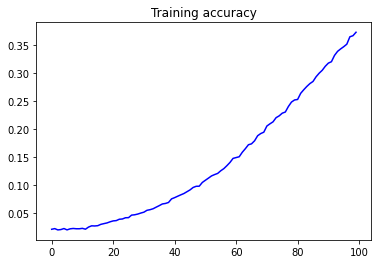

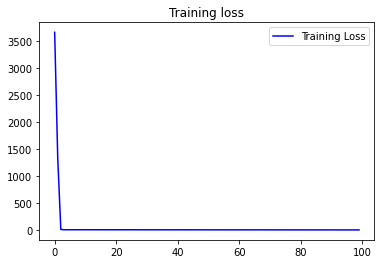

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [23]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope rude grow thee end deeds to amiss part be fire seen kings pride i gone of his doom my spent doom or taken part i appear rich tell your friend new day still new that mine ill was i am the thing their state away doth end ' quite disdain excel tell your friend tell your friend be i be ' doth time do ' lie me made of lies dead liberty decay ' night night being pitch this world bear decay your knife cruel tell i past face wrong decay go canopy your tomb his tomb your end deeds
